# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2023
## Домашнее задание 0. Численное моделирование случайных величин. Графическая интерпретация результатов
### Дедлайн --- 21 сентября 23:59

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

---

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения, моделирование оценок параметров и проверку их теоретических свойств на практике. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

In [ ]:
# Matplotlib needed to correctly display suptitles,
# as well as some other minor things.
# I thought I might as well ensure everything is up to date
%pip install --upgrade matplotlib numpy scipy statsmodels

In [2]:
from __future__ import annotations
import typing
import abc
import dataclasses
import itertools

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

**Зафиксируем** `seed` для воспроизводимости.

In [4]:
np.random.seed(42)



```
# Выбран кодовый формат
```

**Условие задания**: Во всех домашних заданиях практики по статистике Вы будете видеть ключевое слово "промоделируйте" и требование построить график с целью проверки некоторых свойств. В этом домашнем задании мы предлагаем Вам потренировать эти навыки на модельных примерах.

**Гайд, как моделировать оценки**:

Если Вам неизвестно слово "оценка", то всюду считайте, что это случайная величина $\theta = \theta(X_1, ..., X_n)$, где $X_i$ --- одинаково распределённые элементы из некоторого распределения. Позже на лекции термин "оценка" введут строго.

Для моделирования оценки необходимо сгенерировать большое число выборок из одного распределения, построить по каждой из выборок оценку и получить выборку оценок. Далее по выборке оценок можно построить эмпирическую плотность, и на её основе делать какие-то выводы.

Условие домашки.

Аспект-император (тот самый) Анасуримбор Келлхус отдал приказ готовить великую ордалию к походу на север --- в цитадель хаотичного зла. Так как путь пройдёт через кишащие чудовищами голодные пустоши, то путешествие должно быть тщательно спланировано, чтобы армия дошла в полном составе.

Для этого имперские математики моделируют всевозможные проблемы и их решения, чтобы предотвратить потенциальные трудности. На севере никто никогда не был, никто никогда с него не возращался, так что прямого доступа к законам природы севера нет. Однако, есть некоторые догадки и результаты экспериментов, распределения, которые Вы можете генерировать из коробки.

Убедите Аспект-Императора в том, что Вы умеете правильно считать сложные величины и проверять сложные закономерности.

### Задача 1

В данной задаче Вы научитесь численно получать значения из сложных распределений на примере распределения Фишера.

Нашей финальной целью будет промоделировать распределение Фишера и получить точные оценки его мат. ожидания и дисперсии.

**Внимание!**

В рамках данной задачи разрешено генерировать только нормально распределённые величины. Остальные можно получать из них.

Распределение Фишера с степенями свободы $(d_1, d_2)$ представляет собой распределение следующей случайной величины: $F \stackrel{d}{=} \frac{Y_1/d_1}{Y_2/d_2}$, где $Y_i$ --- величина из распределения хи-квадрат со степенью свободы $d_i$, то есть  $Y_i \stackrel{d}{=} \sum\limits_{j = 1}^{d_i} X_{i, j}^2$, где $X_{i, 1}, \ldots, X_{i, d_i}$ независимы и взяты из стандартного нормального распределения.

Распределение Фишера является предельным распределением для построения множества гипотез в статистике, так что его сэмплирование представляет собой важную задачу для численного анализа (и принятия решений).

От распределения Фишера нам нужно две вещи: плотность распределения (для изучения его поведения) и количественные свойства (моменты, для примера).

Фишер вывел формулу плотности распределения аналитически, так что процесс сэмплирования можно проводить одношагово, но это не наш путь. Мы будем получать плотность при помощи KDE, считая её неизвестной (как происходит на практике для величин, плотности которых у нас нет).

Для этого нам нужно получить выборку из распределения Фишера размером хотя бы $N = 1000$ или больше.

Сгенерируйте такую выборку, используя формулы выше. В качестве степеней свободы возьмите значения $d_1 = 5$, $d_2 = 7$. Не забудьте, что элементы выборки должны быть не только одинаково распределёнными, но и независимыми в совокупности.

Генерация распределения Фишера размера $N = 10000$

In [5]:
# Параметры распределения Фишера
f_dof1 = 5
f_dof2 = 7
f_sample_size = 10_000

# Параметры нормального распределения
n_loc = 0
n_scale = 1

Генерация выборок нормального распределения

In [6]:
norm_sample_dof1 = sps.norm.rvs(loc=n_loc, scale=n_scale, size=(f_sample_size, f_dof1))
norm_sample_dof2 = sps.norm.rvs(loc=n_loc, scale=n_scale, size=(f_sample_size, f_dof2))

Получим выборку из распределения Фишера по приведённой выше формуле


In [7]:
f_sample = (np.square(norm_sample_dof1).sum(axis=1) / f_dof1) / (
    np.square(norm_sample_dof2).sum(axis=1) / f_dof2
)

Вспомните, как работает KDE для вычисления плотности по выборке. Прочитайте документацию: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

Постройте в одних осях KDE по Вашей выборке и теоретическую плотность [распределения Фишера](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html), взятую из scipy.

Оценка плотности ядра (KDE)

In [8]:
kde = sps.gaussian_kde(f_sample)

Получим теоретическую плотность распределения Фишера

In [9]:
x = np.linspace(0, np.max(f_sample), f_sample_size)
theoretical_f_density = sps.f.pdf(x, dfn=f_dof1, dfd=f_dof2)

Визуализация

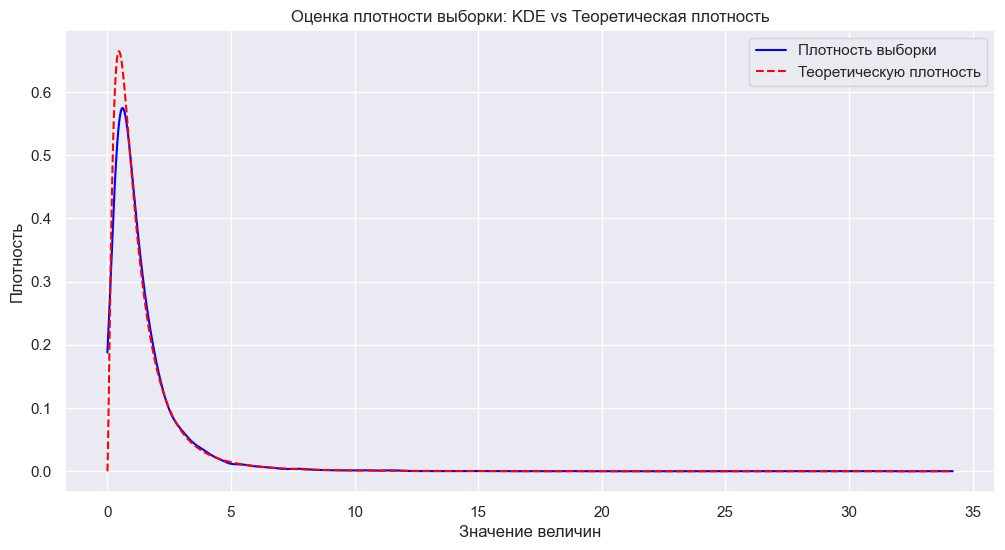

In [10]:
predicted_f_kde = kde(x)

with sns.axes_style("darkgrid"):
    plt.figure(figsize=[12, 6])

    plt.plot(x, predicted_f_kde, label='Плотность выборки', color='blue')
    plt.plot(x, theoretical_f_density, label='Теоретическую плотность', color='red', linestyle='dashed')

    plt.xlabel("Значение величин")
    plt.ylabel("Плотность")
    plt.title("Оценка плотности выборки: KDE vs Теоретическая плотность")

    plt.grid(True)
    plt.legend()
    plt.show()

Похожи ли графики? О чём это говорит?

Ответ:

Глядя на предоставленный график, можно сделать следующие выводы:

1. Визуально можно заметить, что графики достаточно близки. Это указывает на то, что выборка хорошо воспроизводит общие свойства распределения Фишера.

2. Однако есть заметная разница в центральной части (около нуля), где KDE чуть недооценивает плотность. Разница между оценённой и теоретической плотностью в этом месте составляет около 0.1. Это может свидетельствовать о том, что метод KDE не всегда точно оценивает плотность вблизи пиков или резких изменений распределения.    

3. В остальных областях (значение величины больше 5), KDE почти точно повторяет теоретическую плотность. Это показывает, что в "хвостах" распределения метод KDE даёт хорошие оценки. 
    
В итоге, график демонстрирует адекватное воспроизведение плотности выборки, но также подчёркивает необходимость осторожности при использовании KDE для распределений с острыми пиками или особенностями в центральных зонах.

Посмотрите на поведение KDE для разных размеров выборки. Рекомендуем брать не более трёх вариантов, чтобы не захламлять график, возьмите значения как больше, так и меньше изначального $N$ (особенно если ячейки долго работают). Как меняется вид оценки?

In [11]:
def generate_fisher_samples(
    sample_size, d1, d2, normal_dist_loc=0, normal_dist_scale=1
):
    normal_sample_d1 = sps.norm.rvs(
        loc=normal_dist_loc, scale=normal_dist_scale, size=(sample_size, d1)
    )
    normal_sample_d2 = sps.norm.rvs(
        loc=normal_dist_loc, scale=normal_dist_scale, size=(sample_size, d2)
    )
    return (np.square(normal_sample_d1).sum(axis=1) / d1) / (
        np.square(normal_sample_d2).sum(axis=1) / d2
    )

Выборки размера 100, 1000, 20000 и 50000

In [12]:
f_sample_sizes = [100, 5_000, 50_000]

Визуализация

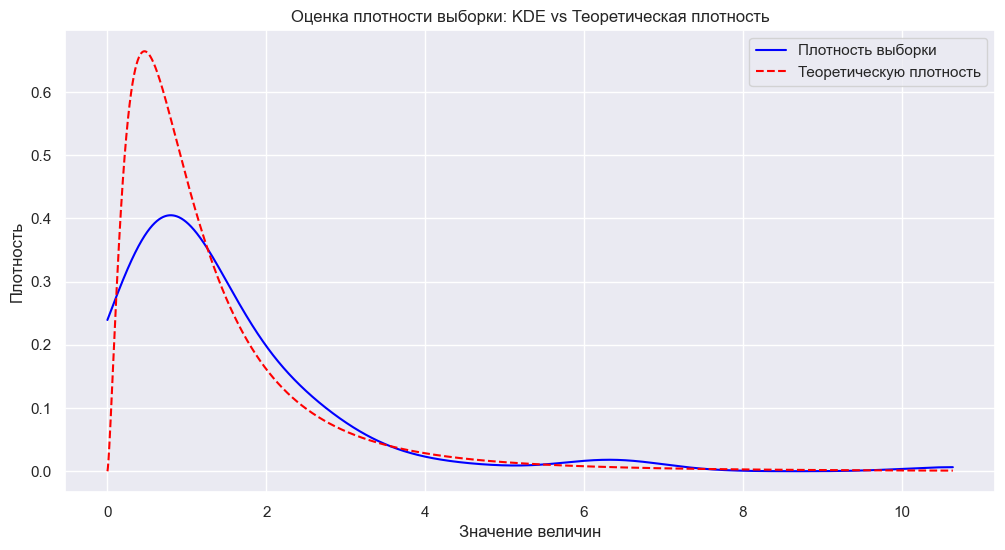

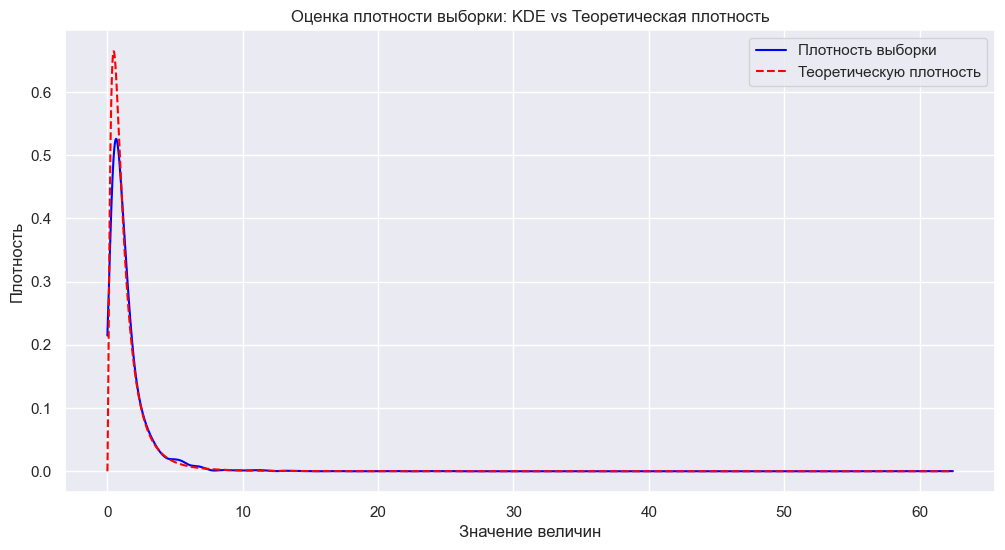

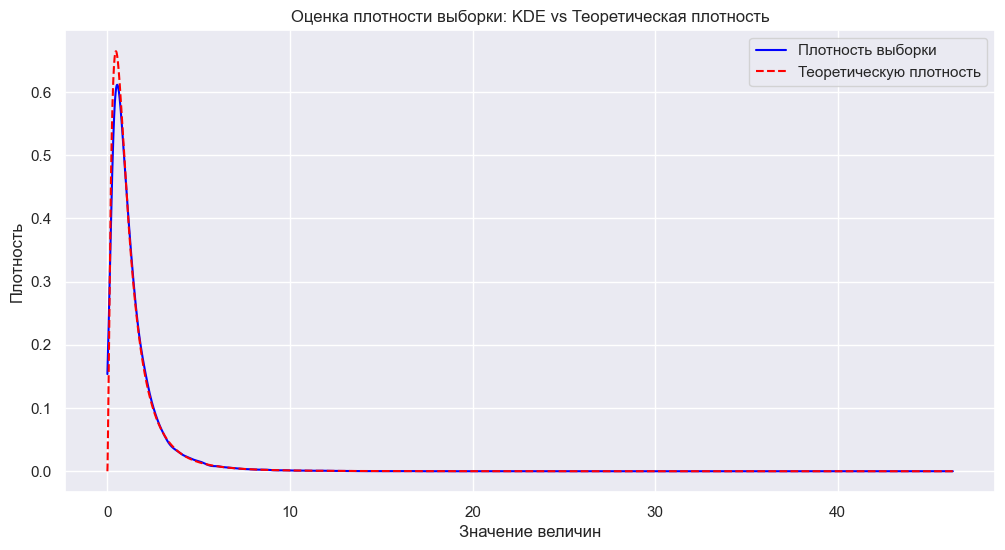

In [13]:
for sample_size in f_sample_sizes:
    # Генерируем выборку из распределения Фишера заданного размера
    f_sample = generate_fisher_samples(sample_size, f_dof1, f_dof2)
    kde = sps.gaussian_kde(f_sample)
    
    x = np.linspace(0, np.max(f_sample), f_sample_size)
    
    # Вычисляем теоретическую плотность распределения Фишера для значений x
    theoretical_f_density = sps.f.pdf(x, dfn=f_dof1, dfd=f_dof2)
    predicted_f_kde = kde(x)

    # Визуализация
    with sns.axes_style("darkgrid"):
        plt.figure(figsize=[12, 6])

        plt.plot(x, predicted_f_kde, label='Плотность выборки', color='blue')
        plt.plot(x, theoretical_f_density, label='Теоретическую плотность', color='red', linestyle='dashed')

        plt.xlabel("Значение величин")
        plt.ylabel("Плотность")
        plt.title("Оценка плотности выборки: KDE vs Теоретическая плотность")
        
        plt.grid(True)
        plt.legend()
        plt.show()

На предоставленных графиках показано поведение KDE (оценки плотности методом ядерного сглаживания) для разных размеров выборки: 100, 5000 и 50000. Вот основные наблюдения:

- Для выборки размера 100 (первый график) :
        На этом графике можно видеть, что оценка KDE заметно отличается от теоретической плотности. Особенно это проявляется в центральной части, где KDE создает излишние колебания и пики, которые отсутствуют в теоретической плотности.
        Причина этих отклонений — небольшой размер выборки, что приводит к плохой аппроксимации плотности распределения и большему шуму в оценке.

- Для выборки размера 5000 (второй график) :
        В случае выборки размера 5000, которая ближе к исходным условиям, KDE начинает лучше воспроизводить теоретическую плотность. Основные отклонения всё ещё наблюдаются вблизи пика (центр распределения), но они гораздо меньше, чем для выборки из 100 элементов.
        Общая форма распределения уже хорошо совпадает с теоретической, хотя KDE всё ещё недооценивает плотность в начале.

- Для выбороки размера 50000 (третий график) :
        По мере увеличения размера выборки до 50000, KDE всё точнее воспроизводит теоретическую плотность. Отклонения становятся минимальными, и разница между теоретической и оценочной плотностью практически незаметна. 

Выводы:
- С увеличением размера выборки метод KDE становится всё более точным, приближаясь к теоретической плотности распределения Фишера.

- При малом размере выборки (например, 100) оценка сильно подвержена шуму и артефактам, что ведёт к значительным отклонениям от истинной плотности.

- Для точной оценки плотности с помощью KDE требуется достаточный объем данных. Как видно из графиков, начиная с выборки около 50000 элементов и выше, оценка уже становится практически идентичной теоретической плотности.

Используя первоначальную выборку, посчитайте мат. ожидание и дисперсию распределения Фишера. Посчитайте теоретически мат. ожидание и дисперсию (формулы есть на Википедии). Сравните результаты.

Математическое ожидание :

   $$ {\displaystyle \mathbb {E} [F]={\frac {d_{2}}{d_{2}-2}}}, \ если \ {\displaystyle d_{2}>2}. $$

Дисперсия : 

   $$ {\displaystyle \mathrm {D} [F]={\frac {2\,d_{2}^{2}\,(d_{1}+d_{2}-2)}{d_{1}(d_{2}-2)^{2}(d_{2}-4)}}},  \ если \ {\displaystyle d_{2}>4}. $$


In [14]:
f_sample_mean = np.mean(f_sample)
f_sample_var = np.var(f_sample)

theoretical_mean = f_dof2 / (f_dof2 - 2)
theoretical_var = (2 * f_dof2**2 * (f_dof1 + f_dof2 - 2)) / (
    f_dof1 * (f_dof2 - 2) ** 2 * (f_dof2 - 4)
)

Вывод результатов

In [15]:
print(f"Выборочное математическое ожидание: {f_sample_mean:.3}")
print(f"Выборочная дисперсия: {f_sample_var:.3}")

print("")

print(f"Теоретическое математическое ожидание: {theoretical_mean:.3}")
print(f"Теоретическая дисперсия: {theoretical_var:.3}")

Выборочное математическое ожидание: 1.4
Выборочная дисперсия: 2.46

Теоретическое математическое ожидание: 1.4
Теоретическая дисперсия: 2.61


Проверьте, что с ростом $N$ эмпирические мат. ожидание и дисперсия сходятся к теоретическим. Сделайте выводы.

Функции для подсчета кумулятивных математических ожиданий и дисперсии

In [16]:
def calc_cum_mean(sample):
    return np.cumsum(sample) / np.arange(1, len(sample) + 1)


def calc_cum_var(sample):
    # Кумулятивная сумма квадратов
    cum_square_sum = np.cumsum(np.square(sample))

    # Кумулятивное количество элементов
    n = np.arange(1, len(sample) + 1)

    # Кумулятивное математическое ожидание
    cum_mean = calc_cum_mean(sample)

    # Кумулятивная дисперсия по формуле
    return (cum_square_sum / n) - np.square(cum_mean)

Проверим сходимость для $N  \to  10000$ с шагом $ 100 $

In [17]:
new_f_sample = generate_fisher_samples(100_000, f_dof1, f_dof2)

Визуализация сходимости математического ожидания

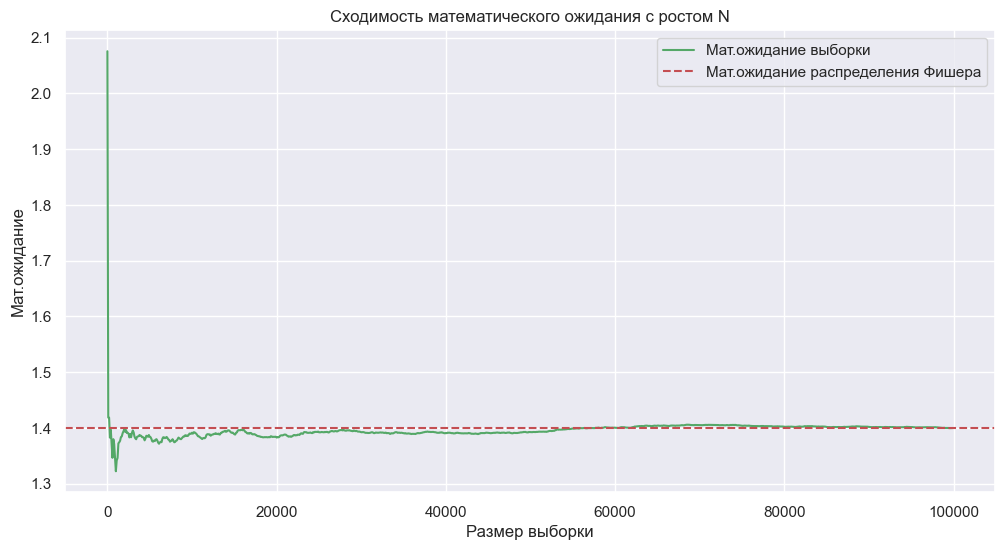

In [18]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=[12, 6])
    
    # Создаем ось x как массив индексов, который идет от 1 до размера выборки с шагом 100
    x = np.arange(1, len(new_f_sample) + 1, 100)

    # График кумулятивного математического ожидания с шагом 100
    plt.plot(x, calc_cum_mean(new_f_sample)[::100], label='Мат.ожидание выборки', color="g")

    # Линия, представляющая теоретическое мат. ожидание
    plt.axhline(y=theoretical_mean, color="r", linestyle="--", label="Мат.ожидание распределения Фишера")

    plt.xlabel("Размер выборки")
    plt.ylabel("Мат.ожидание")
    plt.title("Сходимость математического ожидания с ростом N")

    plt.grid(True)
    plt.legend()
    plt.show()

На предоставленном графике показана сходимость математического ожидания при $N→10000$. Вот основные наблюдения:

1. Для выборки размера менее 1000 (при малых NN):
    - Можно заметить, что математическое ожидание выборки значительно отличается от теоретического. Причина этих отклонений заключается в небольшом размере выборки.

2. Для выборки размера от 1000 до 25000 (первая половина графика, кроме самого начала): 
    - В целом наблюдаются некоторые отклонения от теоретического математического ожидания, однако они остаются достаточно малыми — менее 0.01.

3. Для выборки размера более 45000 (правая часть графика): 
    - По мере увеличения размера выборки математическое ожидание становится практически неотличимым от теоретического. Отклонение составляет менее 0.001.

Визуализация сходимости дисперсии

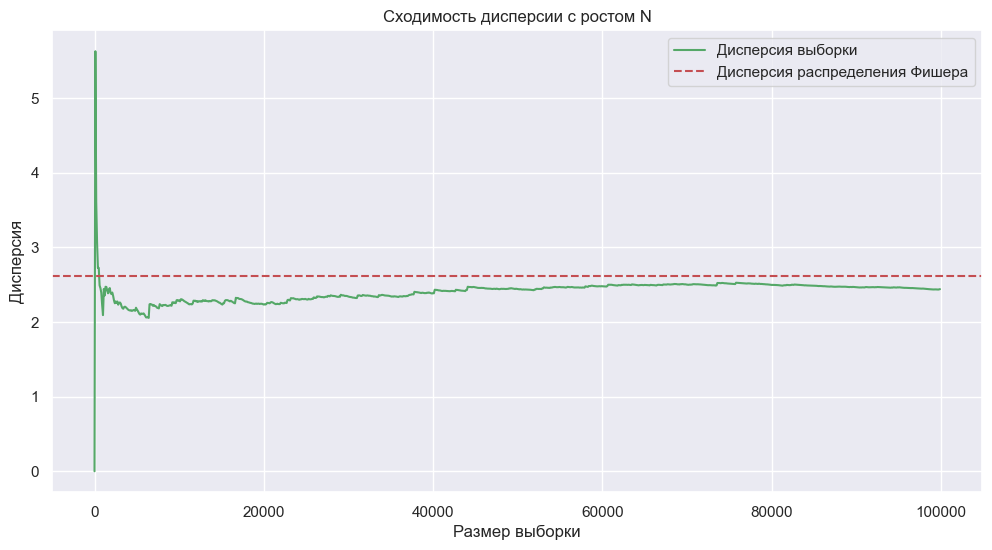

In [19]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=[12, 6])
    
    # Создаем ось x
    x = np.arange(1, len(new_f_sample) + 1, 100)

    # График кумулятивного математического ожидания с шагом 100
    plt.plot(x, calc_cum_var(new_f_sample)[::100], label='Дисперсия выборки', color="g")

    # Линия, представляющая теоретическую дисперсию
    plt.axhline(y=theoretical_var, color="r", linestyle="--", label="Дисперсия распределения Фишера")

    plt.xlabel("Размер выборки")
    plt.ylabel("Дисперсия")
    plt.title("Сходимость дисперсии с ростом N")

    plt.grid(True)
    plt.legend()
    plt.show()

График показывает тенденцию к стабилизации дисперсии выборки при увеличении размера выборки $N$, однако она стабилизируется на уровне ниже теоретической дисперсии распределения Фишера. Текущие данные показывают, что полной сходимости дисперсии не достигается.

Вывод :

- Математическое ожидание сходится к теоретическому значению

- Несмотря на то, что дисперсия начинает приближаться к своему теоретическому значению (обозначенному пунктирной линией), она так и не достигает его полностью

- Математическое ожидание стабилизируется значительно быстрее, при размере выборки около 10 000. В то время как дисперсия, как видно на графике, требует гораздо большего объема данных для стабилизации, достигая стабильности только при размере выборки около 45 000

Вспомните, как работает QQ-plot.

Прочитайте документацию: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

QQ-plot является хорошим прикладным инструментом проверки распределения на принадлежность семейству. Проверьте, что Ваша выборка действительно является выборкой из распределения Фишера, построив QQ-plot

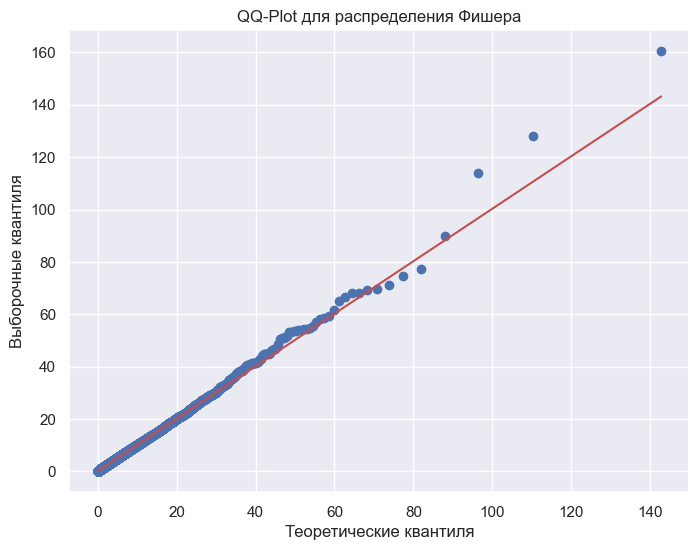

In [20]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(8, 6))

    sps.probplot(generate_fisher_samples(1_000_000, f_dof1, f_dof2), dist="f", sparams=(f_dof1, f_dof2), plot=plt)
    
    plt.xlabel('Теоретические квантиля')
    plt.ylabel('Выборочные квантиля')
    plt.title('QQ-Plot для распределения Фишера')
    
    plt.grid(True)
    plt.show()

В целом можно сказать, что выборка в центральной части следует распределению Фишера, однако на концах (в хвостах) наблюдаются отклонения. Это может свидетельствовать о наличии выбросов или отклонении распределения выборки от распределения Фишера.

Какие выводы можно сделать, если точки в хвостах QQ-plot находятся выше/ниже своей прямой, как на картинке ниже? А если оба "хвоста" находятся с одной стороны прямой?

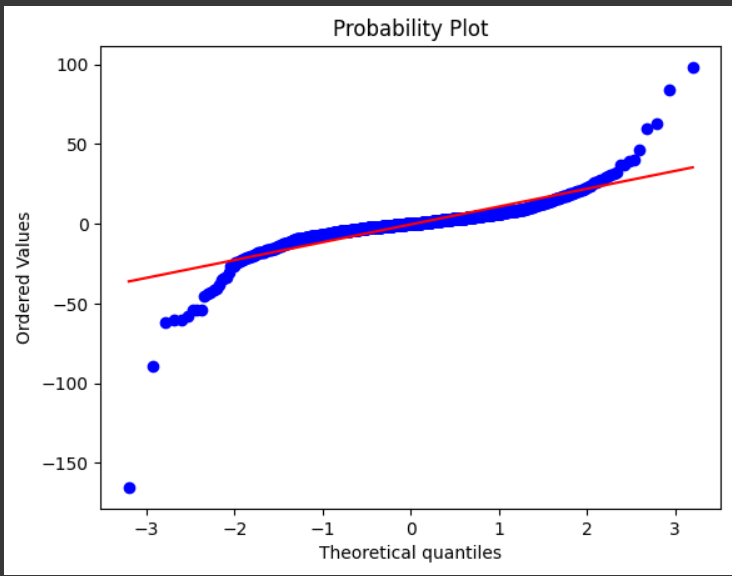

Ответ:

- Если хвост распределения выше прямой, это указывает на то, что данные отдалены от среднего значения, что свидетельствует о большем разбросе значений с этой стороны

- Если хвост ниже прямой, данные более сжаты вокруг среднего, что указывает на меньший разброс значений.

- Если оба хвоста находятся по одну сторону от прямой, это означает, что график данных асимметричен: на одной стороне данные сжаты, а на другой — отдалены от среднего.

### Задача 2

В данной задаче Вам предстоит проверить истинность дельта-метода на практике, используя KDE.

Формулировка теоремы о дельта-методе представлена в методичке курса, глава 1, теорема 1.4.

Нас же интересует задача 3 из списка задач для самостоятельного решения.

#### Условие.
Дана выборка $X_i$ из $N(0, \sigma^2)$,

$Y = \frac{1}{n}\sum_1^n |X_i|$,

$Z = \frac{1}{n}\sum_1^n X_i^2$.

$T = \sqrt{\frac{2}{\pi}}\frac{Z}{Y}$. Куда сходится $P = \sqrt{n}(T - \sigma)$ по распределению?

Скорее всего, Вы решали эту задачу на семинаре. Или решал Ваш сосед по комнате. В любом случае, известно, что предел --- это нормальное распределение с нулевым средним. Посчитайте дисперсию предельного распределения и напишите ответ ниже.

Ответ: $N(0, \frac{\pi - 2}{2} \sigma^2)$

Теперь попробуем увидеть, как ведёт себя величина $T$ и проверить, что она сходится по распределению.

Наш план:

1) Построить выборку независимых величин $P$.

2) Построить хорошее приближение плотности $P$ для каждого $n$.

3) Изучить, как ведёт себя плотность с ростом $n$.

4) Сделать вывод о наличии сходимости по распределению к величине с заданной плотностью.

Рекомендуем Вам изначально зафиксировать несколько вариантов $\sigma$ и проводить параллельное решение каждого пункта задачи для каждого значения.

1) Необходимо построить выборку из величин $P$.

Каждая величина $P$ не может быть сгенерирована напрямую, так что необходимо сгенерировать выборку величин $X_i$ --- по $n$ штук для каждого $P$. Так мы приходим к понятию "выборка выборок".

Сгенерируйте N выборок $X_1, \dots, X_N$ из нормального распределения $N(0, \sigma^2)$ для $N = 10^4$. Если у Вас долго считаются формулы, можете понизить $N$ до 100. Не забывайте про векторные вычисление numpy!

Фиксируем параметры $N = 10^4$ $\sigma = 1, \ 10, \ 100$

In [21]:
sample_size = 10_000
n_loc = 0
n_scale = [1, 10, 100]

Функция для генерации выборки независимых величин $P$

In [22]:
def generate_P(sample_size, normal_sample_loc, normal_sample_scale):
    normal_sample = sps.norm.rvs(
        loc=normal_sample_loc,
        scale=normal_sample_scale,
        size=(sample_size, sample_size),
    )

    Z = np.mean(np.square(normal_sample), axis=1)
    Y = np.mean(np.abs(normal_sample), axis=1)

    T = (Z / Y) * np.sqrt(2 / np.pi)
    return np.sqrt(sample_size) * (T - normal_sample_scale)

Для всех $N$ выборок посчитайте $P$.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

In [23]:
P_sample = [generate_P(sample_size, n_loc, scale) for scale in n_scale]

2) Построить приближение плотности величин $P$.

Вспомните, как работает KDE для вычисления плотности по выборке.
Прочитайте документацию: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

Постройте график плотности выборки величин $P$. Не забудьте про оси графика!

Визуализация графика плотности выборки $P$

Также на одном графике построим Теоретическую плотность случайной величины $P$

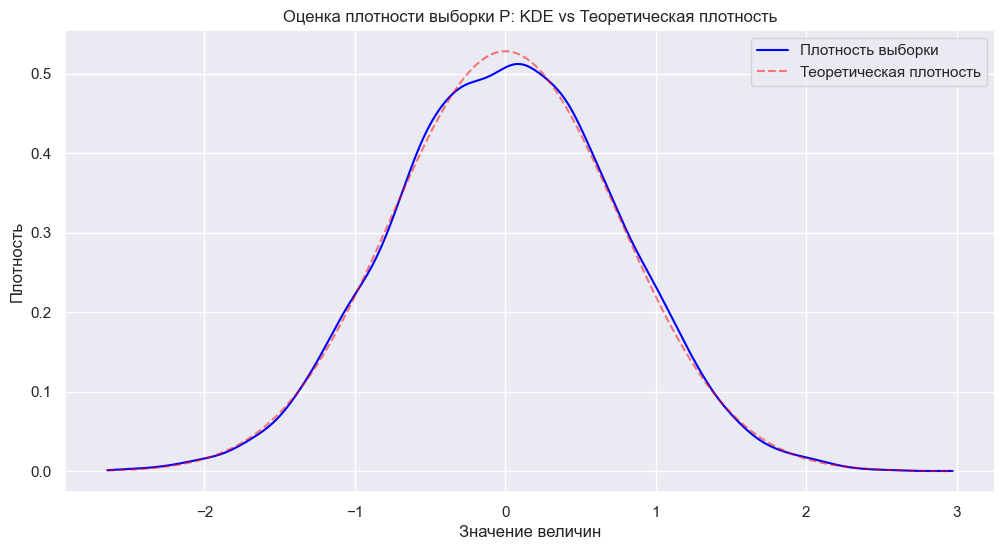

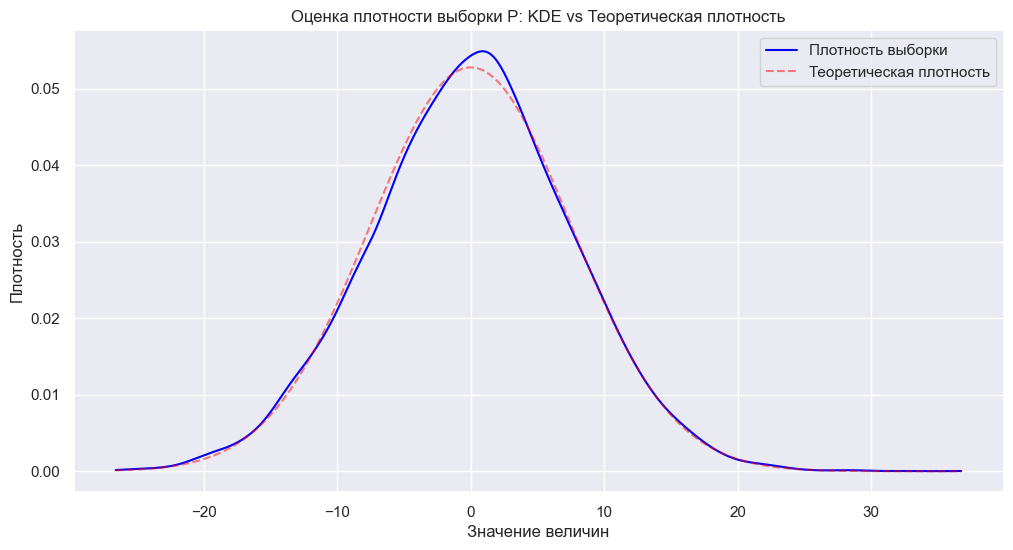

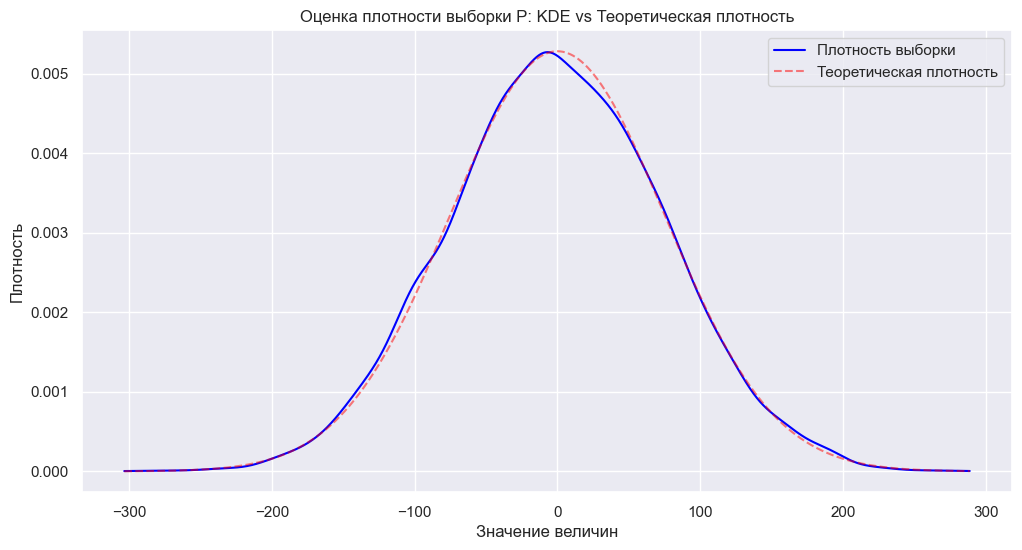

In [24]:
for sample, scale in zip(P_sample, n_scale):
    kde = sps.gaussian_kde(sample)
    
    x = np.linspace(np.min(sample), np.max(sample), sample_size)

    # Вычисляем теоретическую плотность распределения P
    theoretical_density = sps.norm.pdf(x, loc=n_loc, scale=np.sqrt((np.pi - 2) / 2) * scale)
    predicted_kde = kde(x)

    # Визуализация
    with sns.axes_style("darkgrid"):
        plt.figure(figsize=[12, 6])

        plt.plot(x, predicted_kde, label='Плотность выборки', color='blue')
        plt.plot(x, theoretical_density, label='Теоретическая плотность', color='red', linestyle='dashed', alpha=0.5)

        plt.xlabel("Значение величин")
        plt.ylabel("Плотность")
        plt.title("Оценка плотности выборки P: KDE vs Теоретическая плотность")
        
        plt.grid(True)
        plt.legend()
        plt.show()

Из графиков видно, что ядерная оценка плотности (KDE) нашей выборки отлично приближает истинное распределение. Это указывает на то, что данные были сгенерированы корректно, а сам метод KDE демонстрирует высокую точность приближения.

3) Изучить поведение плотности с ростом $n$.

Как мы знаем из курса теории вероятностей, сходимость по распределению эквивалентна поточечной сходимости функций распределения. Теория из мат. анализа гарантирует сходимость функций при наличии сходимости их производных при выполнении некоторых других регулярных условий (см. курс мат. анализа). На практике выводы о наличии сходимости по распределению делаются при помощи демонстрации сходимости плотностей.

На одном графике изобразите жирной линией одного цвета плотность предельного распределения, посчитанного в пункте 1. Не считайте плотность нормального распределения руками, вместо этого используйте scipy.

В тех же осях изобразите полупрозрачными линиями плотности величин P для N = 1000, 2000, ..., 10000.

In [25]:
sample_sizes = [1000 * i for i in range(1, 11)]

Сгенерируем выборки при N = 1000, 2000, ..., 10000

In [26]:
P_samples = {
    scale: [generate_P(sample_size, n_loc, scale) for sample_size in sample_sizes]
    for scale in n_scale
}

Визуализация

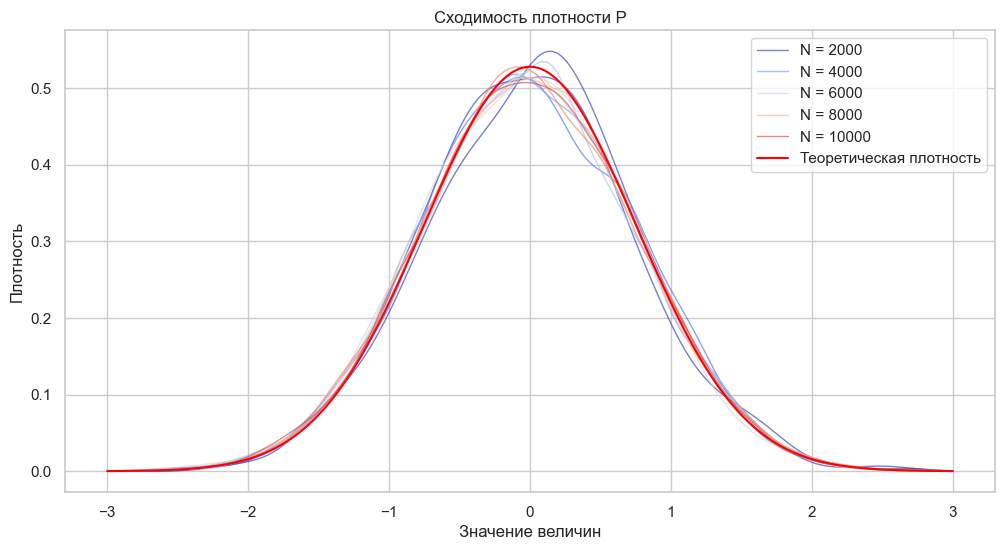

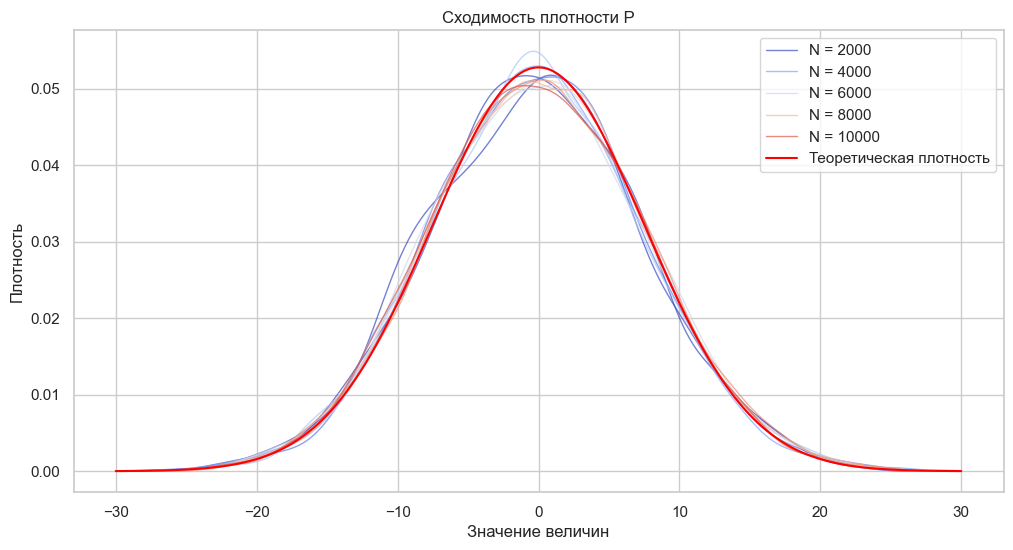

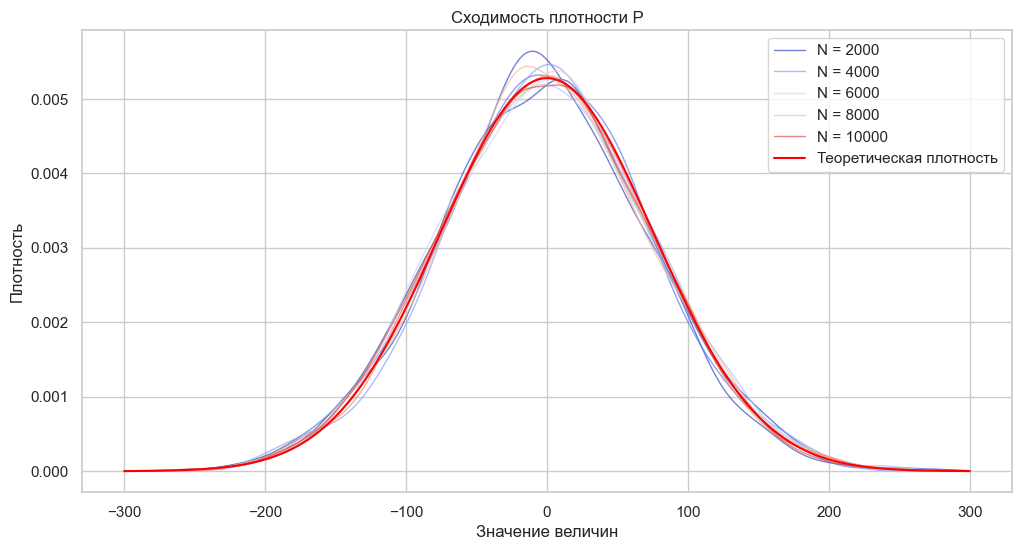

In [27]:
for scale in n_scale:
    x = np.linspace(-3 * scale, 3 * scale, 10**4)

    cmap = plt.get_cmap("coolwarm")  
    norm = plt.Normalize(vmin=1, vmax=10)

    # Вычисляем теоретическую плотность распределения P
    theoretical_density = sps.norm.pdf(x, loc=n_loc, scale=np.sqrt((np.pi - 2) / 2) * scale)

    # Визуализация
    with sns.axes_style("whitegrid"):
        plt.figure(figsize=[12, 6])

        # Плотность выборки при N = 1000, 2000, ..., 10000
        for j, sample in enumerate(P_samples[scale]):
            kde = sps.gaussian_kde(sample)
            predicted_kde = kde(x)
            
            color = cmap(norm(j))
            label = f'N = {sample_sizes[j]}' if j % 2 == 1 else None  # Легенда только для нечётных    
            plt.plot(x, predicted_kde, color=color, alpha=0.7, linewidth=1, label=label)        

        # Теоретическую плотность распределения P
        plt.plot(x, theoretical_density, label='Теоретическая плотность', color='red', alpha=1)
    
        plt.xlabel("Значение величин")
        plt.ylabel("Плотность")
        plt.title("Cходимость плотности P")
    
        plt.grid(True)
        plt.legend()
        plt.show()

Сделайте выводы о том, видна ли сходимость? Как Вы это поняли?

Вывод:

Из графиков видно, что в целом все значения $N$ имеют форму колокола и мало отличаются от нормального распределения. Однако при увеличении $N$ разница между графиками исходной плотности становится менее заметной. Это наблюдение позволяет сделать вывод о том что сходимость плотностей есть: с увеличением объема выборки оценки плотности становятся более похожими на истинное распределение.

Также иногда доказывают равномерную сходимость плотностей по определению.

Выберите достаточно малое $\varepsilon$ и заштрихуйте на графике область точек, где находятся графики функций $g$, для которых верно $|g(x) - f(x)| \leq \varepsilon$ для любых $x$, где $f$ --- предельная плотность.

Полупрозрачными линиями нарисуйте графики плотностей величины $P$ для достаточно больших $N$.

In [28]:
sample_sizes = [i for i in range(500, 5001, 500)]
eps = 0.02

In [29]:
P_samples = {
    scale: [generate_P(sample_size, n_loc, scale) for sample_size in sample_sizes]
    for scale in n_scale
}

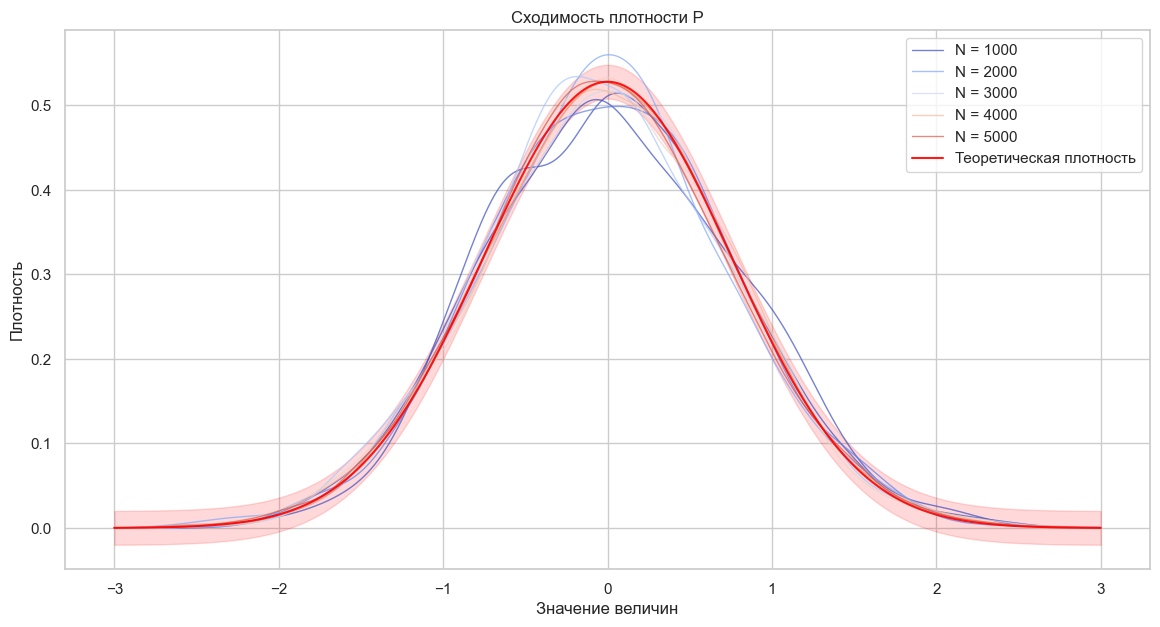

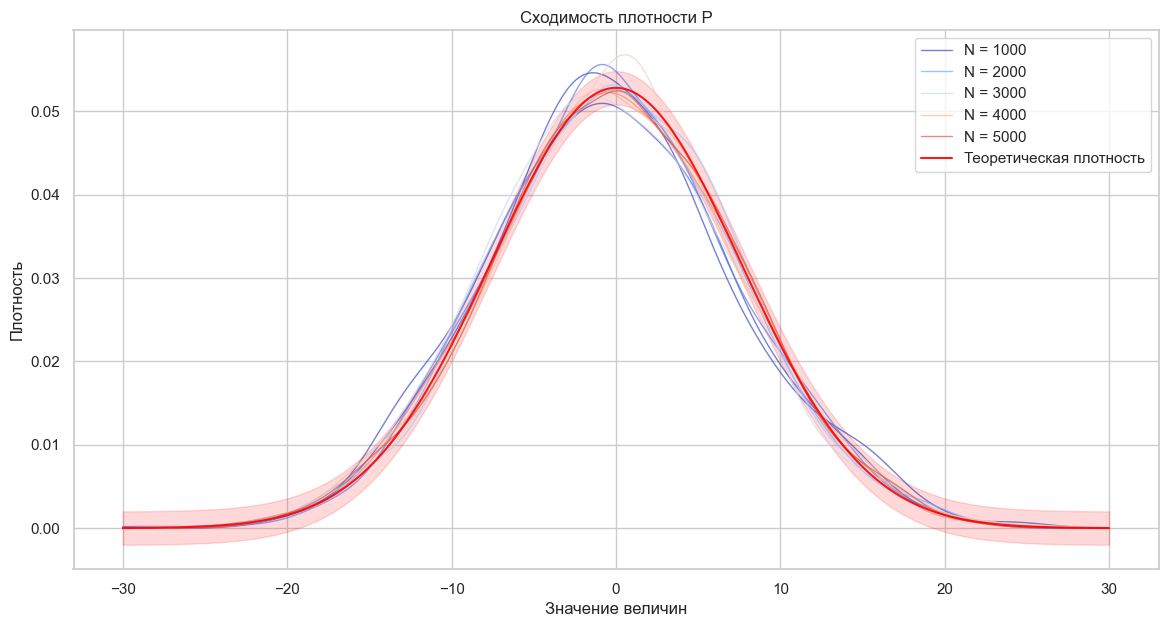

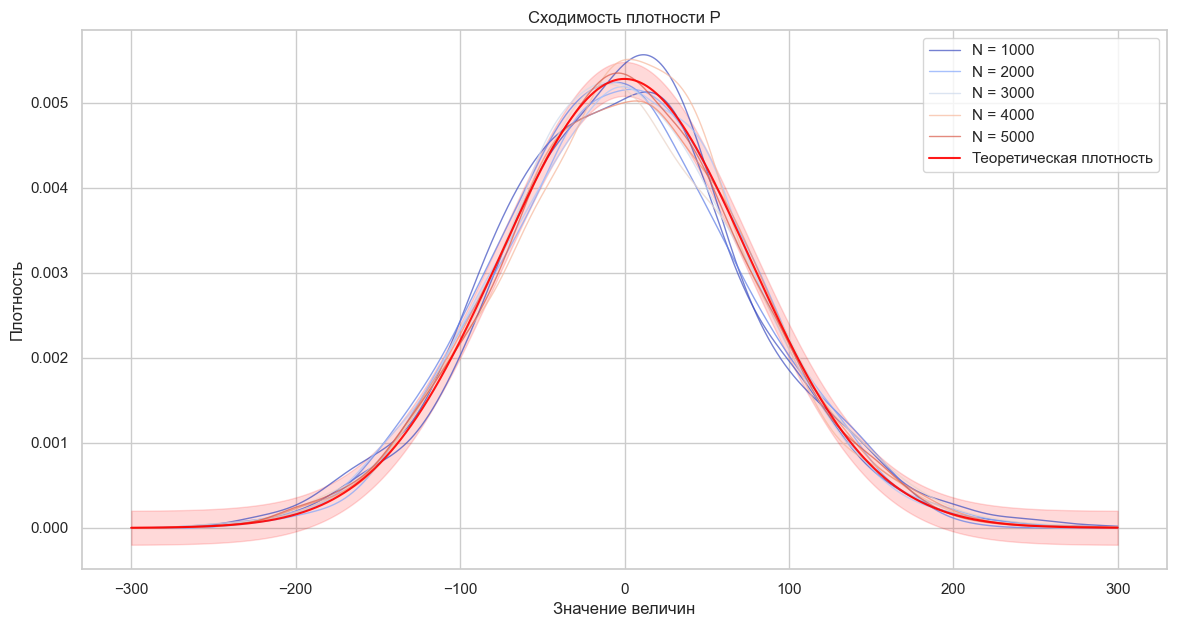

In [30]:
for scale in n_scale:
    x = np.linspace(-3 * scale, 3 * scale, 10**4)

    cmap = plt.get_cmap("coolwarm")  
    norm = plt.Normalize(vmin=1, vmax=10)

    # Вычисляем теоретическую плотность распределения P
    theoretical_density = sps.norm.pdf(x, loc=n_loc, scale=np.sqrt((np.pi - 2) / 2) * scale)

    # Визуализация
    with sns.axes_style("whitegrid"):
        plt.figure(figsize=[14, 7])

        # Плотность выборки при N = 1000, 2000, ..., 10000
        for j, sample in enumerate(P_samples[scale]):
            kde = sps.gaussian_kde(sample)
            predicted_kde = kde(x)
            
            color = cmap(norm(j))    
            label = f'N = {sample_sizes[j]}' if j % 2 == 1 else None  # Легенда только для нечётных    
            plt.plot(x, predicted_kde, color=color, alpha=0.7, linewidth=1, label=label)

        # Теоретическую плотность распределения P
        plt.plot(x, theoretical_density, label='Теоретическая плотность', color='red', alpha=0.9)
        plt.fill_between(x=x, y1=theoretical_density + eps / scale, y2=theoretical_density - eps / scale, alpha=0.15, color="red")

        plt.xlabel("Значение величин")
        plt.ylabel("Плотность")
        plt.title("Cходимость плотности P")
    
        plt.grid(True)
        plt.legend()
        plt.show()

Можно отметить, что для $N=50000$ все три графика находятся внутри закрашенной области. В то же время, для малых $N$ это наблюдение не справедливо, особенно заметно в центре графика, где различия становятся более выраженными.


Верно ли, что для всех больших $N$ графики лежат в окрестности предела? Проверьте это условие численно для какой-нибудь сетки точек.
Доделайте доказательство сходимости по распределению.

In [31]:
sample_sizes = [i for i in range(500, 5001, 100)]
eps = 0.03

In [32]:
P_samples = {
    scale: [generate_P(sample_size, n_loc, scale) for sample_size in sample_sizes]
    for scale in n_scale
}

Фиксируем сетку точек

In [33]:
x = {scale: np.linspace(-3 * scale, 3 * scale, 10**4) for scale in n_scale}

Вычисляем теоретическую плотность распределения $P$

In [34]:
P_theoretical_density = {
    scale: sps.norm.pdf(x[scale], loc=n_loc, scale=np.sqrt((np.pi - 2) / 2) * scale)
    for scale in n_scale
}

Вычисляем оченку плотности распределения $P$ через KDE

In [35]:
P_kde = {
    scale: {
        sample_size: sps.gaussian_kde(
            P_samples[scale][sample_sizes.index(sample_size)]
        )(x[scale])
        for sample_size in sample_sizes
    }
    for scale in n_scale
}

Посчитаем число точек для которых: оценка плотности лежит на расстоянии больше чем $\varepsilon$ от значения теоретического плотности в этой точке

In [36]:
P_abs_error = {
    scale: [
        np.sum(np.abs(P_kde[scale][sample_size] - P_theoretical_density[scale]) > eps / scale)
        for sample_size in sample_sizes
    ]
    for scale in n_scale
}

Визуализация

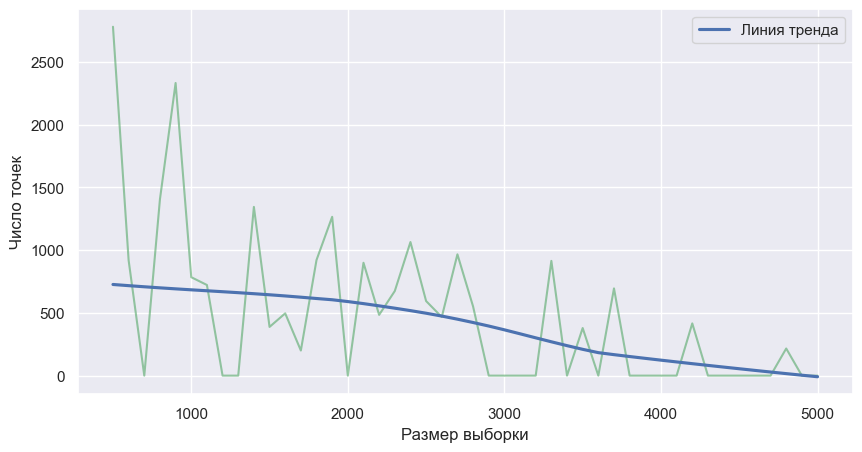

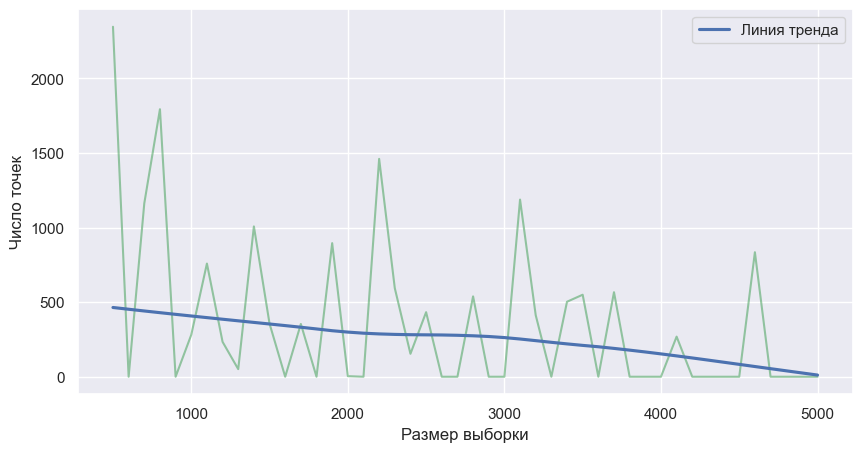

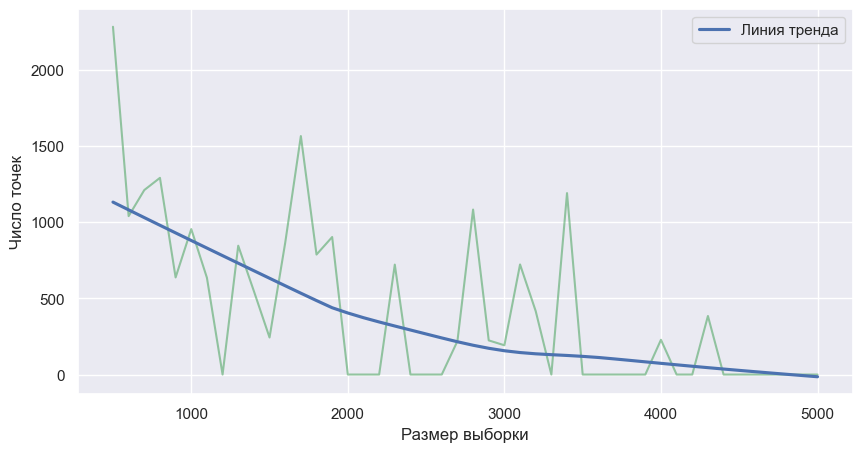

In [37]:
for scale in n_scale:
    with sns.axes_style("darkgrid"):
        plt.figure(figsize=[10, 5])

        plt.plot(sample_sizes, P_abs_error[scale], color='g', alpha=0.6)
        
        # линия тренда с помощью линейной регрессии
        sns.regplot(x=sample_sizes, y=P_abs_error[scale], scatter=False, 
                    lowess=True, color='b', label='Линия тренда')
        
        plt.xlabel("Размер выборки")
        plt.ylabel("Число точек")
    
        plt.grid(True)
        plt.legend()
        plt.show()

Ответ:

На основе графика можно утверждать, что с ростом размера выборки число точек, для которых оценка плотности существенно отличается от теоретической, сокращается, хоть и с большими фулктуациями. Что подтверждает гипотезу о том что для всех больших $N$ графики лежат в окрестности предела.

Сделайте вывод о возможности применения KDE для визуализации поведения распределений.

Вывод:

Метод позволяет сгладить данные, создавая непрерывную кривую, которая отображает вероятностную плотность.

KDE полезен в следующих случаях:

- Выявление структуры данных: Он помогает лучше понять сложные распределения, скрывающиеся за дискретными данными.
- Интерпретация результатов: Гладкая кривая более интуитивно понятна для восприятия, чем гистограммы, и лучше передает информацию о тенденциях и закономерностях.

Ядерной оценки плотности (KDE) есть и некоторые недостатки:

- Чувствительность к выбору ядра: Разные функции ядра могут давать различные результаты. Неправильно выбранное ядро может привести к искажению структуры данных.

- Требования к объему данных: Для качественной оценки плотности требуется достаточно большая выборка. При малом объеме данных результаты могут быть нестабильными.

### Задача 3

В этой задаче мы будем учиться проверять сходимость по мере случайных величин к константе (позже это свойство назовут состоятельностью).

Будем работать с распределением $U[0, \theta]$ --- равномерным распределением на отрезке и оценкой $\hat{\theta} = \frac{n+1}{n}X_{(n)}$, где $X_{(i)}$ --- $i$-тый член вариационного ряда выборки ($i$-тое по порядку число, если выборку отсортировать), то есть оценивать параметр мы будем максимумом.

Мы будем численно доказывать, что это состоятельная оценка (т.е. она сходится по мере к значению параметра).

Сгенерируйте по одной оценке $\theta$ для $N$ от 1 до 1000.

Фиксируем $\theta = 1, \ 10, \ 100$

In [38]:
thetas = [1, 10, 100]
sample_size = 10**3

Генерация равномерного распределения

In [39]:
uniform_sample = {theta : sps.uniform.rvs(0, theta, size=sample_size) for theta in thetas}

Из выборки получаем оценки $\theta$

In [40]:
sample_estimation = {
    theta: (
        np.maximum.accumulate(uniform_sample[theta]) / np.arange(1, sample_size + 1)
    )
    * np.arange(2, sample_size + 2)
    for theta in thetas
}

Отобразите на графике в осях $n, \theta$ поведение этой оценки. Сходится ли она? Как быстро?

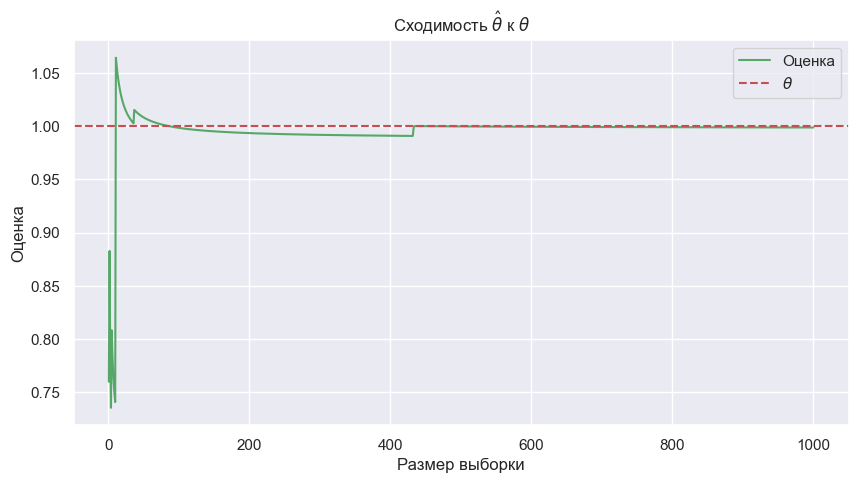

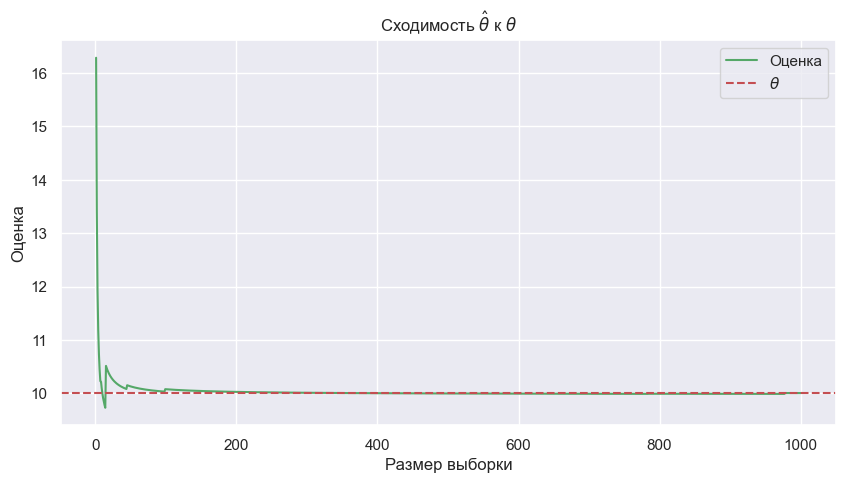

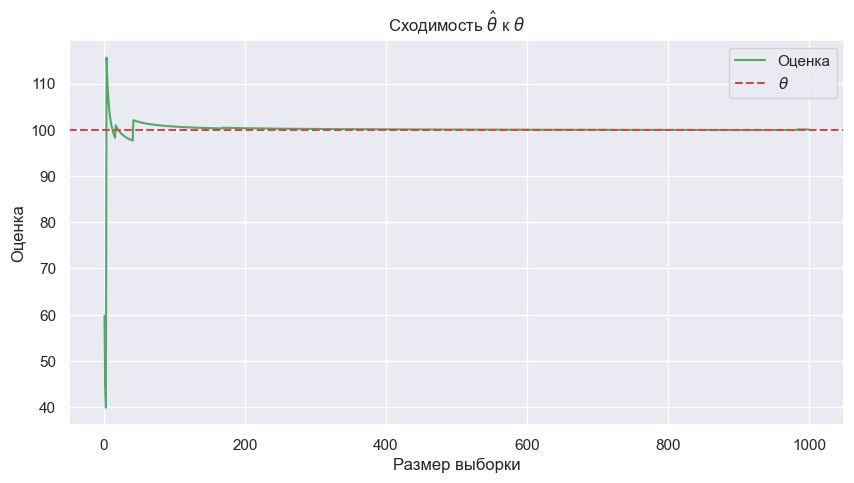

In [41]:
for theta in thetas:
    with sns.axes_style("darkgrid"):
        plt.figure(figsize=[10, 5])
        
        x = np.arange(1, sample_size + 1)

        # оценка theta
        plt.plot(x, sample_estimation[theta], label='Оценка', color="g")

        # theta
        plt.axhline(y=theta, color="r", linestyle="--", label=r"$\theta$")

        plt.xlabel("Размер выборки")
        plt.ylabel("Оценка")
        plt.title(r"Сходимость $\hat{\theta}$ к $\theta$")

        plt.grid(True)
        plt.legend()
        plt.show()

Оценка сходится достаточно быстро: на графике видно, что уже при $N=50$ значения $\hat{\theta}$ очень близки к истинному $\theta$ .

По одной траектории, конечно, вывод о сходимости по вероятности делать нельзя.

Почему?

Ответ:

Для сходимости по мере нужно изучить поведение многих траекторий. По определению, $P(|\hat{\theta}_n - \theta| > \varepsilon)$ сходится к нулю. То есть для любого наперёд заданного эпсилон с ростом $n$ всё больше и больше траекторий должны попадать в эпсилон-окрестность истинного значения параметра.

Проверим.

На одном графике изобразите:

1) Горизонтальные прямые --- значение параметра и его эпсилон-окрестности (заштрихуйте её и выделите границы)

2) Сгенерируйте 1000 траекторий поведения оценки и полупрозрачными линиями нарисуйте их.

In [42]:
experiment_count = 1000
epsilons = [0.01, 0.1, 1]

Сгенерируем выборки для эксперимента

In [43]:
uniform_sample = {
    theta: sps.uniform.rvs(0, theta, size=(experiment_count, sample_size))
    for theta in thetas
}

sample_estimation = {
    theta: (
        np.maximum.accumulate(uniform_sample[theta], axis=1)
        / np.arange(1, sample_size + 1)
    )
    * np.arange(2, sample_size + 2)
    for theta in thetas
}

Визуализация

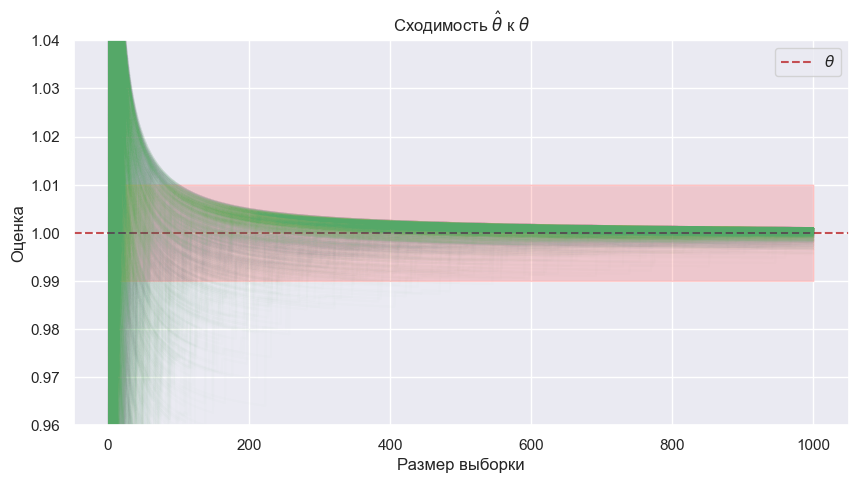

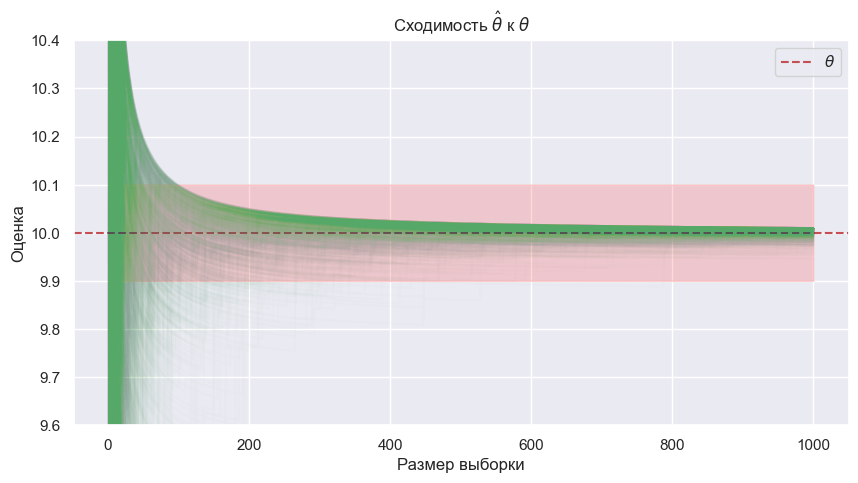

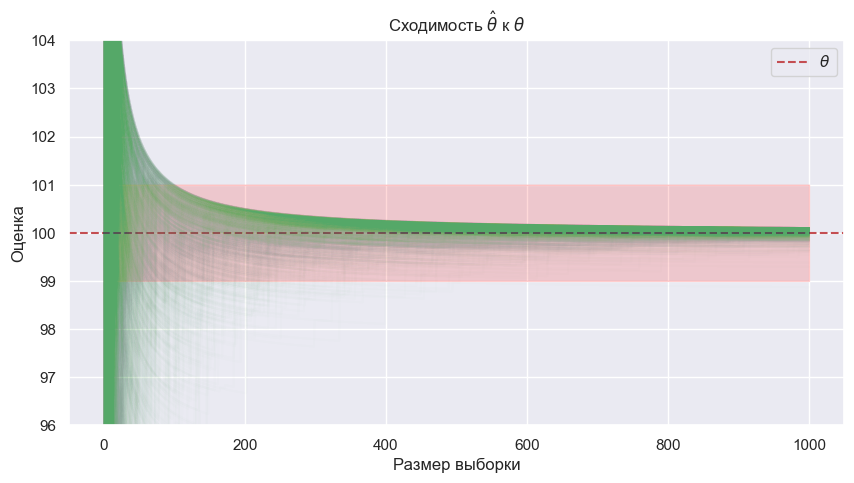

In [44]:
for theta, eps in zip(thetas, epsilons):
    with sns.axes_style("darkgrid"):
        plt.figure(figsize=[10, 5])
        
        x = np.arange(1, sample_size + 1)

        # theta
        plt.axhline(y=theta, color="r", linestyle="--", label=r"$\theta$")
        plt.fill_between(x=x, y1=theta + eps, y2=theta - eps , alpha=0.15, color="red")

        for i in range(experiment_count):
            # оценка theta
            plt.plot(x, sample_estimation[theta][i], color="g", alpha=0.01)

        plt.xlabel("Размер выборки")
        plt.ylabel("Оценка")
        plt.title(r"Сходимость $\hat{\theta}$ к $\theta$")

        plt.ylim(0.96 * theta,1.04 * theta)

        plt.grid(True)
        plt.legend()
        plt.show()

Поведение 

Численно проверьте, какая доля траекторий не попадает в окрестность для каждого $N$. Сходится ли это число к нулю?

In [45]:
out_neighborhood_ratio = {
    theta: (
        (sample_estimation[theta] >= theta + eps)
        | (sample_estimation[theta] <= theta - eps)
    ).sum(axis=0)
    / experiment_count
    for eps, theta in zip(epsilons, thetas)
}

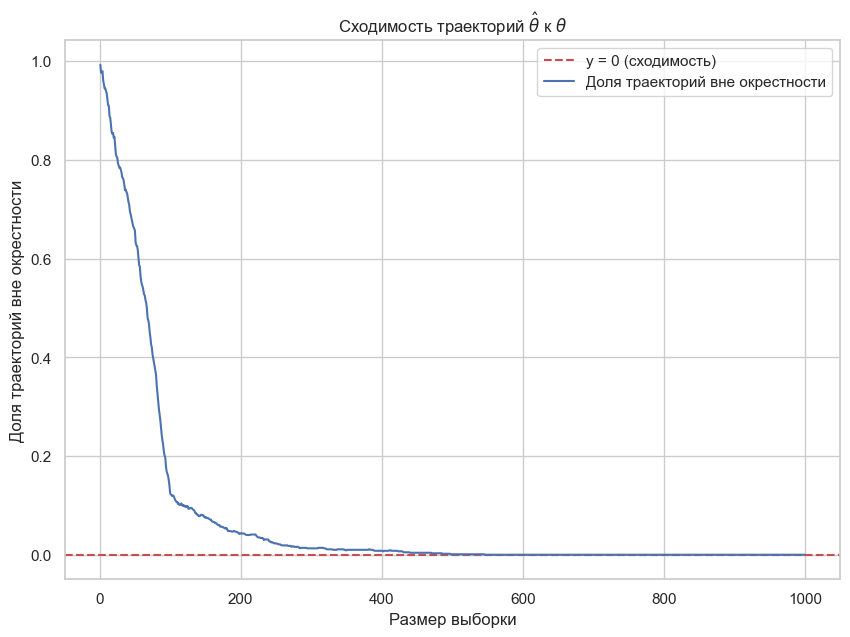

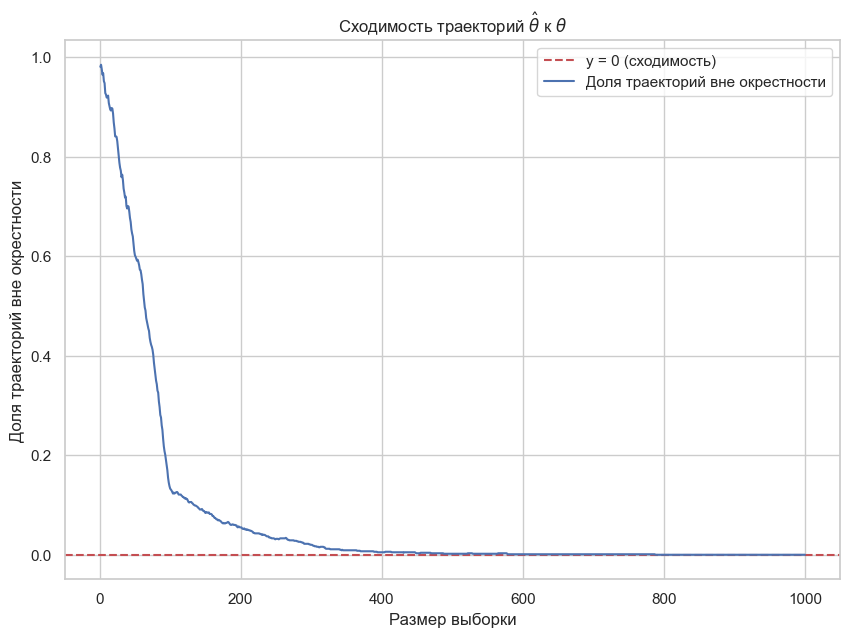

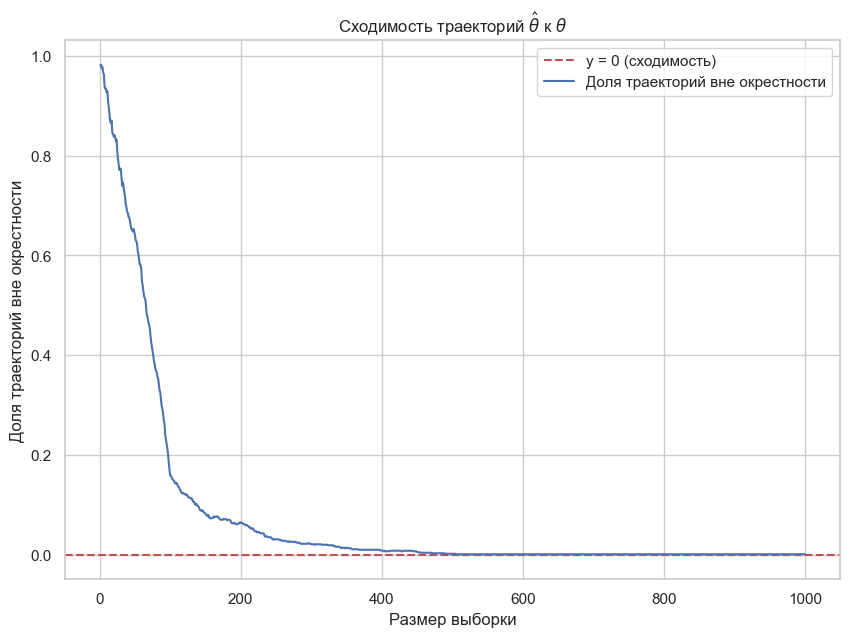

In [46]:
for theta in thetas:
    with sns.axes_style("whitegrid"):
        plt.figure(figsize=[10, 7])
        
        x = np.arange(1, sample_size + 1)

        plt.axhline(y=0, color='r', linestyle='--', label='y = 0 (сходимость)')

        plt.plot(x, out_neighborhood_ratio[theta], color='b',label="Доля траекторий вне окрестности")

        plt.xlabel("Размер выборки")
        plt.ylabel('Доля траекторий вне окрестности')
        plt.title(r'Сходимость траекторий $\hat{\theta}$ к $\theta$')

        plt.grid(True)
        plt.legend()
        plt.show()

Сделайте вывод о том, наблюдается ли сходимость по мере.

Вывод:

По графику видно, что с увеличением объёма выборки доля траекторий, не попадающих в окрестность истинного значения параметра $\theta$, постепенно уменьшается. Это указывает на то, что оценка $\hat{\theta} = \frac{n+1}{n} X_{(n)}$ сходится по мере к истинному значению $\theta$. Таким образом, мы можем заключить, что сходимость по мере действительно наблюдается для данной оценки.

Повторите эксперимент для 2-3 разных $\theta$ и сделайте выводы.

Уже было сделано

Вывод:

При повторном проведении эксперимента для различных значений параметра $\theta=1, 10, 100$ мы не наблюдали существенных различий в результатах. Это связано с тем, что в рамках рассматриваемой задачи все, что мы делаем, — это берём максимум и генерируем выборку из равномерного распределения. Поскольку максимальное значение выборки зависит исключительно от ее структуры и распределения, а не от конкретных значений $\theta$, можно сделать вывод о том, что изменение этого параметра не влияет на результаты эксперимента. Таким образом, наблюдаемые значения остаются стабильными вне зависимости от выбранного $\theta$.

**Бонусный вопрос:** (баллами не оценивается, но даёт пищу для ума).

На практике статистики не отличают состоятельность от сильной состоятельности и проверяют оба свойства одинаково. Годится ли наш метод практической проверки для проверки сильной состоятельности? Как можно было бы проверить её качественнее?

Ответ: